<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 29, 2016: class
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Lecture notes of today (November 29, 2016) class in Python about frequences, ChiSquared distribution and statistical tests.
</div>

In [1]:
from sympy import *
from sympy import stats

import sys

from random import randint, randrange, normalvariate, shuffle
from collections import Counter, defaultdict

from itertools import permutations
from statistics import mean

sys.setrecursionlimit(10000000)
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [2]:
t, m, i, k, n, z = symbols('t m i k n z')
a, b = IndexedBase('a'), IndexedBase('b')

In [3]:
def draw_frequencies_histogram(seq, bins, normed=None, pdf=None):
    
    if callable(pdf):
        normed=True
        domain, theo_fn = pdf(seq)
        plt.plot(domain, [theo_fn(i) for i in domain], 'b')
    
    n, bins, patches = plt.hist(list(seq), bins, normed=normed, facecolor='green', alpha=0.5)
    
    plt.grid(True)
    plt.show()

In [45]:
class stats_test:
    
    def __init__(self, observed):
        self.observed = observed
    
    def __call__(self, f):
        
        def C(samples, *args, repetitions=1, **kwds):
            obs = []
            for r in range(repetitions):
                freqs = Counter(f(*args, **kwds) for _ in range(samples))
                o = self.observed(freqs)
                obs.append(float(o))

            return obs if repetitions-1 else {'freqs': freqs, 'observed': o}

        return C

# $\chi^{2}$ pdf
- https://en.wikipedia.org/wiki/Chi-squared_distribution
- http://docs.sympy.org/dev/modules/stats.html#sympy.stats.ChiSquared

In [18]:
def ChiSquared_distribution(z, freedom_degrees):
    X_Chi_rv = stats.ChiSquared(symbols('x'), freedom_degrees)
    pdf = stats.density(X_Chi_rv)
    return Lambda([z], pdf(z))

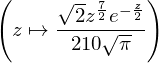

In [19]:
ChiSquared_fn = ChiSquared_distribution(z, freedom_degrees=9)
ChiSquared_fn

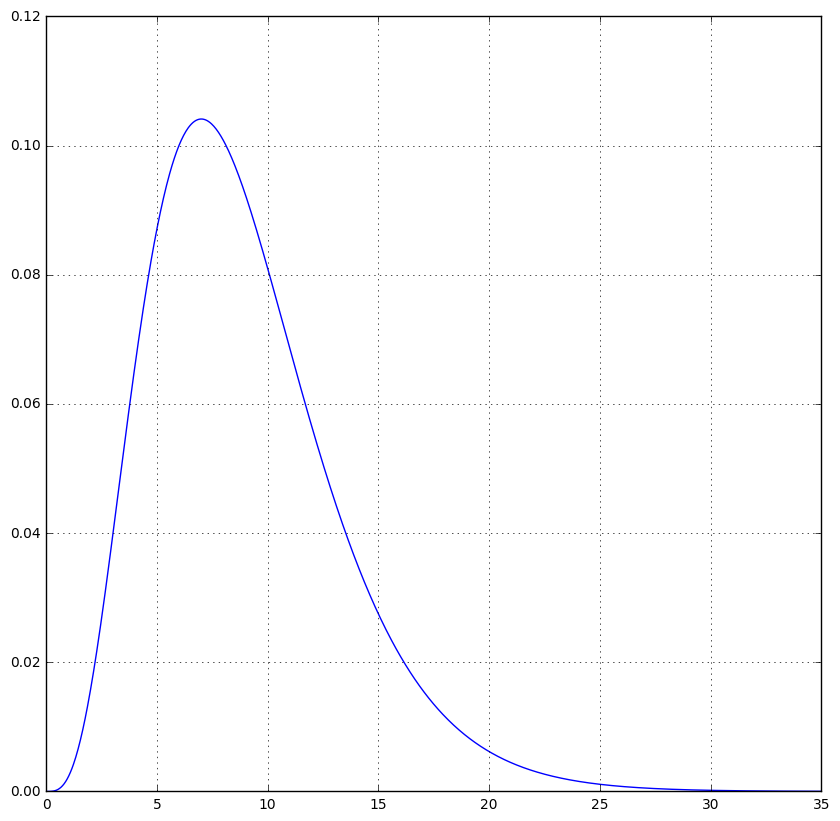

In [20]:
from numpy import linspace

domain = linspace(0, 35, 1e3)
plt.plot(domain, [ChiSquared_fn(i) for i in domain], 'b')
plt.grid(True)
None

In [21]:
def Chi_square_observed(freqs):
    f = sum(freqs.values())/Integer(len(freqs))
    return sum((f-v)**2 for v in freqs.values())/f

# Frequencies

In [22]:
[randint(1, 10) for i in range(5)]

Function `test_randint` will use function `random.randint` to sample `N` times a number in $\{1,\ldots,n\}$, producing a `Counter` object:

In [61]:
@stats_test(Chi_square_observed)
def test_randint(n):
    return randint(1, n)

In [62]:
experiment = test_randint(n=10, samples=500)
experiment['freqs']

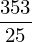

In [63]:
experiment['observed']

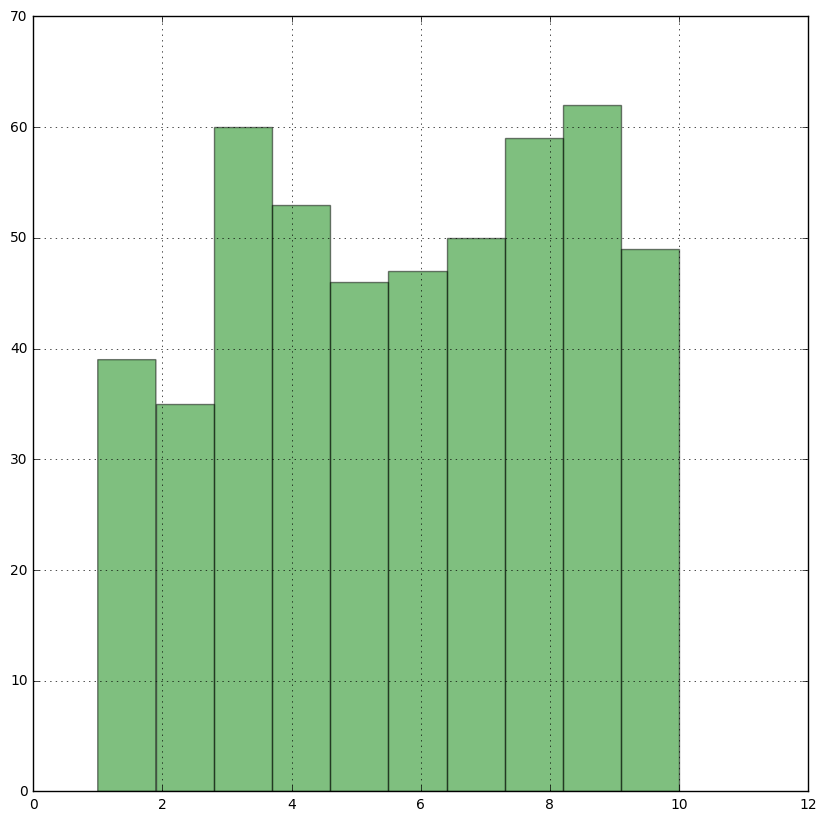

In [64]:
draw_frequencies_histogram(experiment['freqs'].elements(), bins=len(experiment['freqs']))

In [66]:
n = 10
experiment = test_randint(n=n, samples=2000, repetitions=1000)

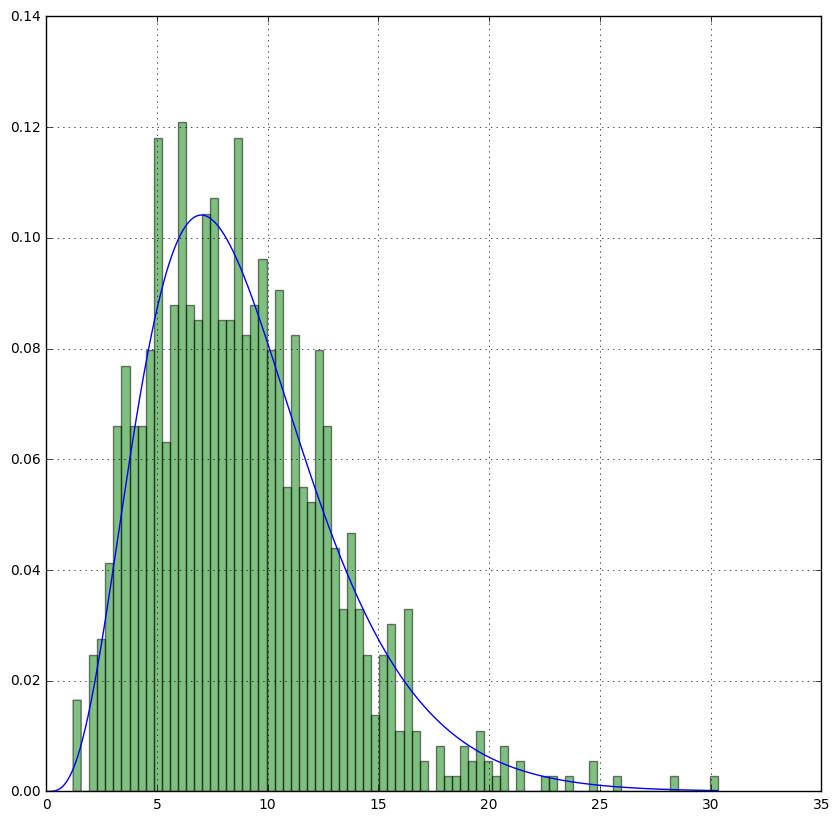

In [67]:
draw_frequencies_histogram(experiment, bins=80, 
                           pdf=lambda seq: (linspace(0, max(seq), 1e3), 
                                            ChiSquared_distribution(z, freedom_degrees=n-1)))

# $\mathcal{N}$ pdf

- http://docs.sympy.org/dev/modules/stats.html#sympy.stats.Normal

In [29]:
def Normal_distribution(z, mean, std):
    Normal_rv = stats.Normal(symbols('x'), mean, std)
    pdf = stats.density(Normal_rv)
    return Lambda([z], pdf(z))

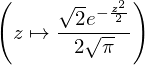

In [30]:
Normal_fn = Normal_distribution(z, 0, 1)
Normal_fn

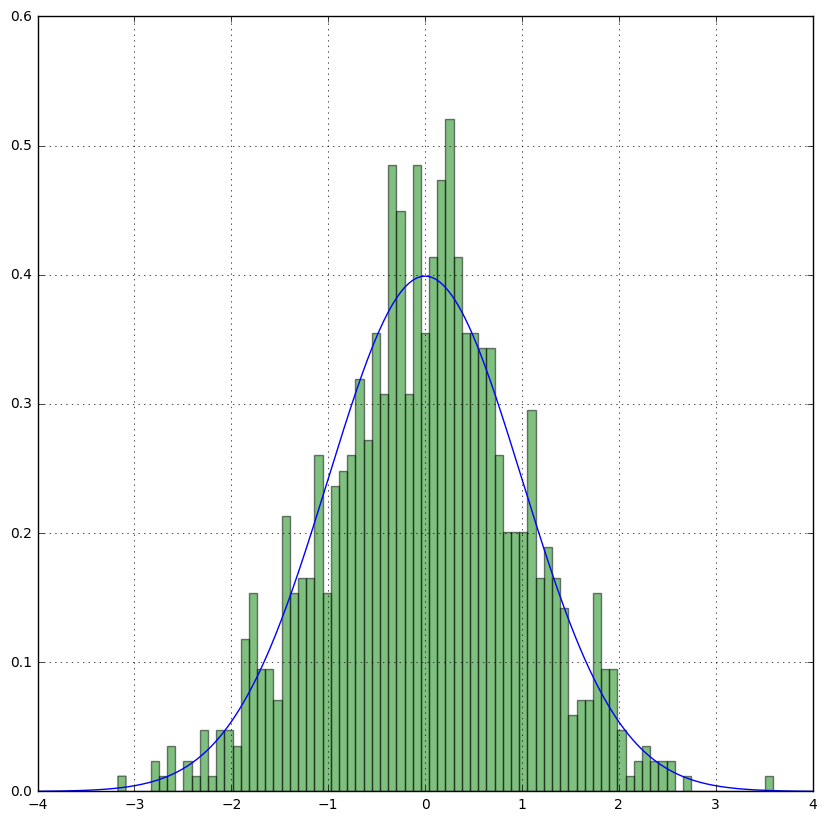

In [31]:
N = 1000
draw_frequencies_histogram([normalvariate(0, 1) for _ in range(N)], 80, 
                           pdf=lambda seq: (linspace(-4, 4, 1e3), Normal_fn))

# Permutations

In [36]:
@stats_test(Chi_square_observed)
def rand_perm(seq):
    shuffle(seq)
    return tuple(seq)

In [52]:
a = IndexedBase('a')
experiment = rand_perm(seq=[a[i] for i in range(5)], samples=10**4)

In [53]:
experiment['freqs']

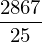

In [54]:
experiment['observed']

In [56]:
#draw_frequencies_histogram(experiment['freqs'].elements(), bins=len(experiment['freqs']))

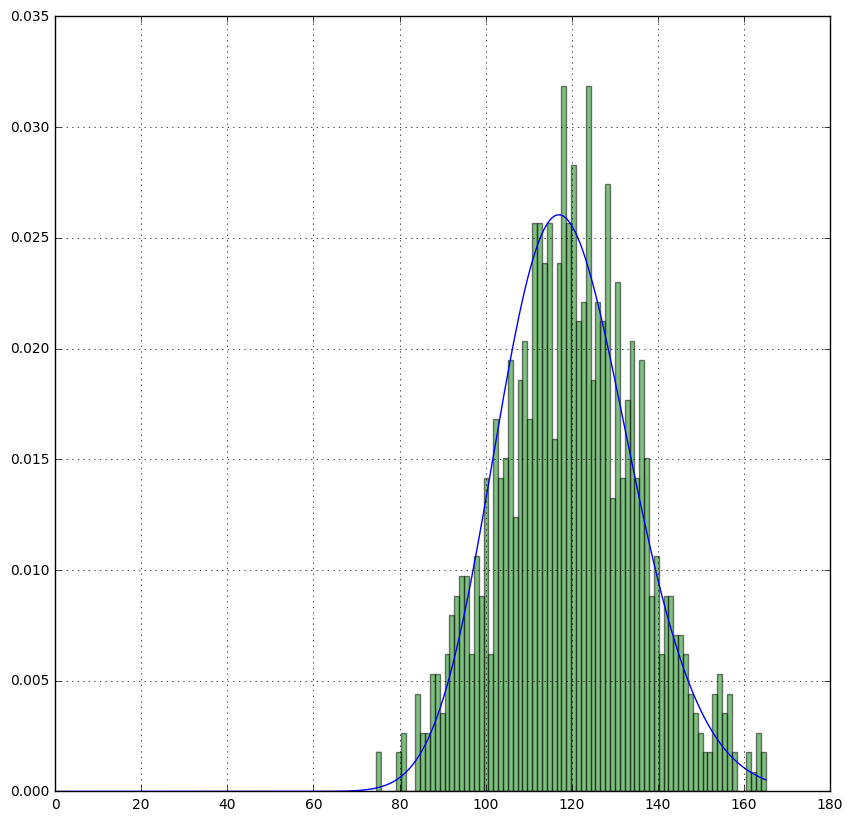

In [68]:
n = 5
experiment = rand_perm(seq=[a[i] for i in range(n)], samples=10**4, repetitions=10**3)
draw_frequencies_histogram(experiment, bins=80, 
                           pdf=lambda seq: (linspace(0, max(seq), 1e3), 
                                            ChiSquared_distribution(z, freedom_degrees=factorial(n)-1)))

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.